# Computing the area of the Mandelbrot set
### Q1. implement the iteration and create colourful pictures of the fractal

In question 1 we define the function `mendelbrot_set` and give the plot of the estimate aera $A_M$ of the Mandelbrot set.

From the image, the color bar on the right indicates the number of iterations. The central region, which is usually black or a darker shade, represents the points that belong to the Mandelbrot set. As the color temperature increases, so does the number of iterations, indicating that the corresponding complex points escape to infinity at a faster rate. The edges of the image, particularly the areas in red and yellow, represent points where the number of iterations is close to or has reached the set maximum limit.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

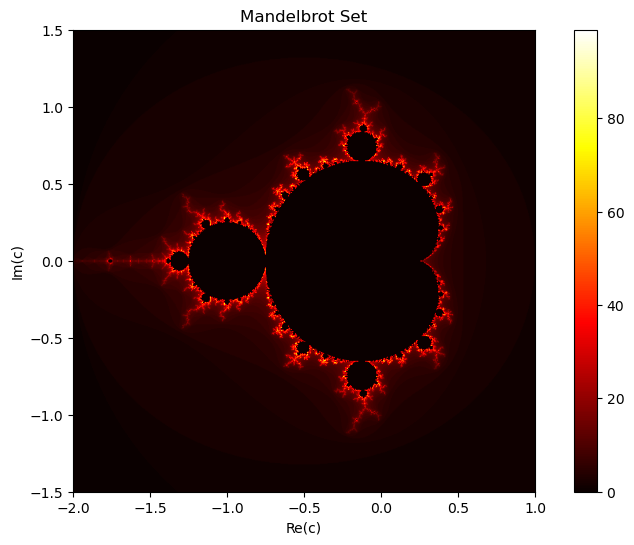

In [3]:
# Q1. Plot the Mendelbrot set

# Set the image width and height
width, height = 800, 800

# Define the function to generate the Mandelbrot set image
def mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter):
    # Create a black image
    image = np.zeros((height, width))
    # Generate a grid of complex numbers (the Mandelbrot set is defined in the complex plane)
    real_values = np.linspace(x_min, x_max, width)
    imaginary_values = np.linspace(y_min, y_max, height)
    # For every point in the grid, perform the Mandelbrot iteration
    for x in range(width):
        for y in range(height):
            c = complex(real_values[x], imaginary_values[y])
            z = 0
            for i in range(max_iter):
                z = z*z + c
                if (z.real*z.real + z.imag*z.imag) >= 4:
                    image[y, x] = i
                    break
    return image

# Generate the Mandelbrot set image with 100 iterations
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5
max_iter = 100

image = mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter)

# Plot the generated image
plt.figure(figsize=(10, 6))
plt.imshow(image, cmap='hot', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.title('Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()


We define the function `monte_carlo_mandelbrot_area` to estimate the area of the Mandelbrot set of each combination of iterations and samples, and then plot the results. Each line represents an estimate with a different number of iterations, ranging from 250 to 2500. The horizontal axis shows the number of samples on a logarithmic scale, while the vertical axis shows the corresponding area estimate values.

It can be seen from the graph that as the number of iterations $i$ and the number of samples $s$ increase, the area estimate values $A_{i,s}$ will converge to the theoratical area value $A_m$.

/Users/minkilee/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/minkilee/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/minkilee/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/minkilee/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/minkilee/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


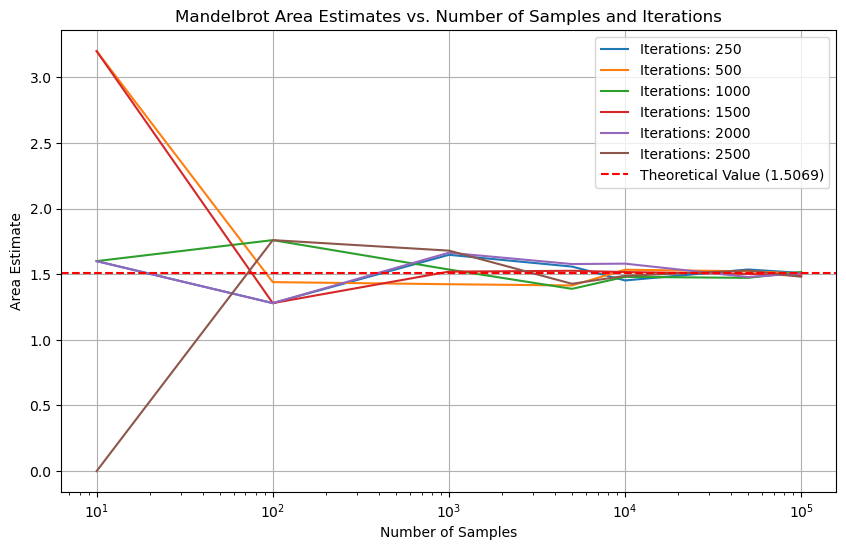

In [4]:
# Q1. Mandelbrot Area Estimates vs. Number of Samples and Iterations

# Define the function to check if a point is in the Mandelbrot set
def is_in_mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return False, n  # The sequence is unbounded
    return True, max_iter  # The sequence is presumed to be bounded

# Implement the Monte Carlo method to estimate the area of the Mandelbrot set
def monte_carlo_mandelbrot_area(iterations, samples, x_min=-2, x_max=2, y_min=-2, y_max=2):
    # Count the points inside the Mandelbrot set
    count_inside = 0
    # Record the iteration counts for points inside the Mandelbrot set
    iterations_to_escape = []
    
    # Area of the sample region
    sample_area = (x_max - x_min) * (y_max - y_min)
    
    for _ in range(samples):
        # Random point in the sample region
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        c = complex(x, y)
        
        # Check if the point is in the Mandelbrot set
        in_set, iter_count = is_in_mandelbrot(c, iterations)
        if in_set:
            count_inside += 1
            iterations_to_escape.append(iter_count)
    
    # Estimate the Mandelbrot set area
    estimated_area = count_inside / samples * sample_area
    
    return estimated_area, np.mean(iterations_to_escape), np.std(iterations_to_escape)

# Lists of iterations and samples
iterations_list = [250, 500, 1000, 1500, 2000, 2500]
samples_list = [10, 100, 1000, 5000, 10000, 50000, 100000]

# Running the estimation for different combinations of iterations and samples
results = {}     # Store results {iterations: {samples: result}}

for iterations in iterations_list:
    results[iterations] = {}
    for samples in samples_list:
        area_estimate, mean_iterations, std_iterations = monte_carlo_mandelbrot_area(iterations, samples)
        results[iterations][samples] = {
            'area_estimate': area_estimate,
            'mean_iterations': mean_iterations,
            'std_iterations': std_iterations
        }

results  # Output a summary of results

# Create a plot for each number of iterations
plt.figure(figsize=(10, 6))
for iterations in iterations_list:
    sample_sizes = []
    area_estimates = []
    for samples in samples_list:
        sample_sizes.append(samples)
        area_estimates.append(results[iterations][samples]['area_estimate'])

    plt.plot(sample_sizes, area_estimates, label=f'Iterations: {iterations}')

# Give theoretical area value and plot
theoretical_value = 1.5069  
plt.axhline(y=theoretical_value, color='r', linestyle='--', label='Theoretical Value (1.5069)')

# Add plot title and labels
plt.title('Mandelbrot Area Estimates vs. Number of Samples and Iterations')
plt.xlabel('Number of Samples')
plt.ylabel('Area Estimate')
plt.legend()
plt.xscale('log')  # Use logarithmic scale for better visibility
plt.grid(True)
plt.show()

We plot the Monte Carlo approximations of the Mandelbrot set with increasing iterations $i$. At lower iterations (such as $i=1,2$), the distribution of points is almost random with no discernible structure. However, as the number of iterations increases, the typical shape of the Mandelbrot set begins to emerge, especially in the images after $i=8$. This is because with each iteration, more points are excluded as they escape to the exterior of the set, while those that remain gradually map out the boundary of the set.

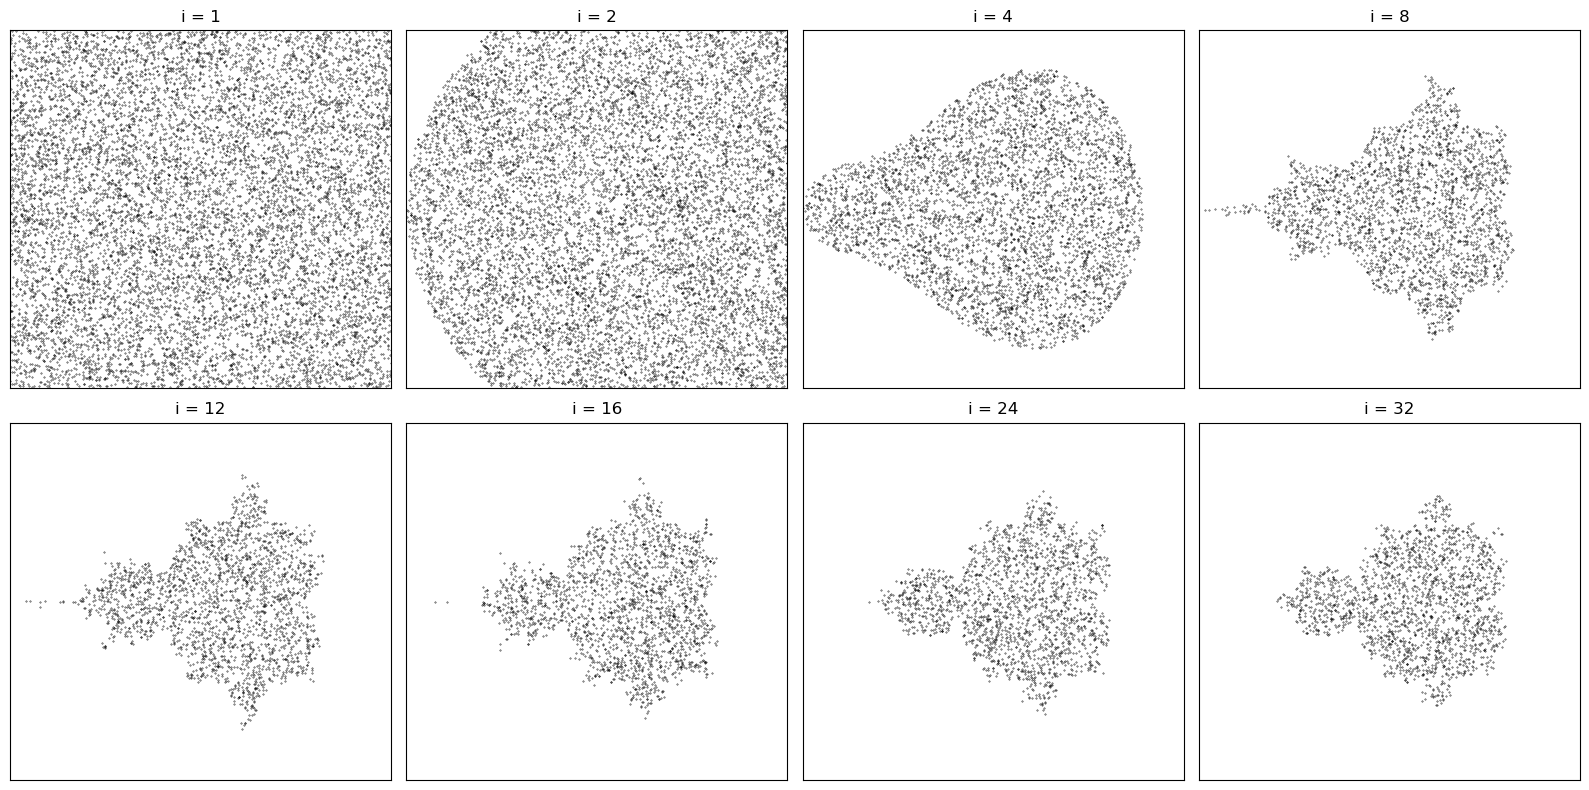

In [5]:
# Q1. Monte Carlo approximations of the Mandelbrot set with increasing iterations

# Define mandelbrot set
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return False
        z = z * z + c
    return True

# Set up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(16, 8), subplot_kw={'xticks': [], 'yticks': []})

# Parameters for the grid
real_bounds = [-2, 1]
imag_bounds = [-1.5, 1.5]
sample_size_per_subplot = 10000  # Number of points to sample per subplot

# Different iteration counts
i_values = [1, 2, 4, 8, 12, 16, 24, 32]

# Generate plots
for ax, iterations in zip(axes.flat, i_values):
    # Sample points
    real_samples = np.random.uniform(low=real_bounds[0], high=real_bounds[1], size=sample_size_per_subplot)
    imag_samples = np.random.uniform(low=imag_bounds[0], high=imag_bounds[1], size=sample_size_per_subplot)
    c_samples = real_samples + imag_samples * 1j

    # Check if each sampled point is in the Mandelbrot set
    in_set = [mandelbrot(c, iterations) for c in c_samples]

    # Scatter plot for points in the Mandelbrot set
    ax.scatter(real_samples[in_set], imag_samples[in_set], color='black', s=0.1)
    # Set the title for the current subplot
    ax.set_title(f'i = {iterations}')
    ax.set_xlim(real_bounds)
    ax.set_ylim(imag_bounds)

# Display
plt.tight_layout()
plt.show()


### Q2. Investigate the convergence of $A_{i,s}$ $\rightarrow$ $A_m$


In [6]:
# Q2 e
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return False
        z = z*z + c
    return True

def estimate_area(num_samples, max_iter):
    count = 0
    for _ in range(num_samples):
        real = np.random.uniform(-2, 1)
        imag = np.random.uniform(-1.5, 1.5)
        c = complex(real, imag)
        if mandelbrot(c, max_iter):
            count += 1
    return count / num_samples * 9

for max_iter in [50, 100, 200]:  
    for num_samples in [1000, 10000, 100000]:  
        estimated_area = estimate_area(num_samples, max_iter)
        print(f"interation: {max_iter}, sample: {num_samples}, estimated are: {estimated_area}")


interation: 50, sample: 1000, estimated are: 1.683
interation: 50, sample: 10000, estimated are: 1.5903
interation: 50, sample: 100000, estimated are: 1.57914
interation: 100, sample: 1000, estimated are: 1.638
interation: 100, sample: 10000, estimated are: 1.5723
interation: 100, sample: 100000, estimated are: 1.5335100000000002
interation: 200, sample: 1000, estimated are: 1.5659999999999998
interation: 200, sample: 10000, estimated are: 1.5183
interation: 200, sample: 100000, estimated are: 1.52343


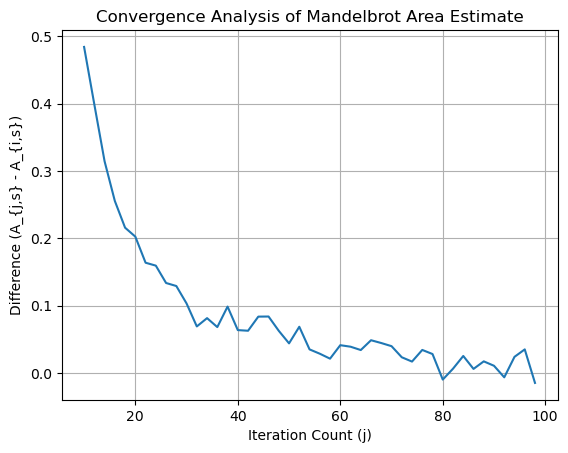

In [9]:
# Assuming monte_carlo_mandelbrot_area function is defined

i = 100 
s = 1000
j_values = range(10, i, 2)  

area_i_s, _, _ = monte_carlo_mandelbrot_area(i, s)

differences = []
for j in j_values:
    area_j_s, _, _ = monte_carlo_mandelbrot_area(j, s)
    diff = area_j_s - area_i_s
    differences.append(diff)

    
plt.plot(j_values, differences)
plt.xlabel('Iteration Count (j)')
plt.ylabel('Difference (A_{j,s} - A_{i,s})')
plt.title('Convergence Analysis of Mandelbrot Area Estimate')
plt.grid(True)
plt.show()


In [7]:
# Define three kinds of sampling

# Pure random sampling
def pure_random_sampling(num_samples, max_iter):
    count = 0
    for _ in range(num_samples):
        real = np.random.uniform(-2, 1)
        imag = np.random.uniform(-1.5, 1.5)
        c = complex(real, imag)
        if mandelbrot(c, max_iter):
            count += 1
    return count / num_samples * 9

# Latin hypercube sampling
def latin_hypercube_sampling(num_samples, max_iter):
    from scipy.stats import qmc
    sampler = qmc.LatinHypercube(d=2)
    sample = sampler.random(n=num_samples)
    sample[:, 0] = sample[:, 0] * 3 - 2  # Scale to -2 to 1
    sample[:, 1] = sample[:, 1] * 3 - 1.5  # Scale to -1.5 to 1.5
    count = 0
    for s in sample:
        c = complex(s[0], s[1])
        if mandelbrot(c, max_iter):
            count += 1
    return count / num_samples * 9

# Orthogonal sampling 
def orthogonal_sampling(num_samples, max_iter):
    count = 0
    n = int(np.sqrt(num_samples))  
    for i in range(n):
        for j in range(n):
            real = np.random.uniform(-2 + (3 / n) * i, -2 + (3 / n) * (i + 1))
            imag = np.random.uniform(-1.5 + (3 / n) * j, -1.5 + (3 / n) * (j + 1))
            c = complex(real, imag)
            if mandelbrot(c, max_iter):
                count += 1
    return count / num_samples * 9

In [10]:
def compute_accuracy(method, num_samples, max_iter, num_runs):
    areas = [method(num_samples, max_iter) for _ in range(num_runs)]
    mean_area = np.mean(areas)
    std_dev = np.std(areas)
    return mean_area, std_dev


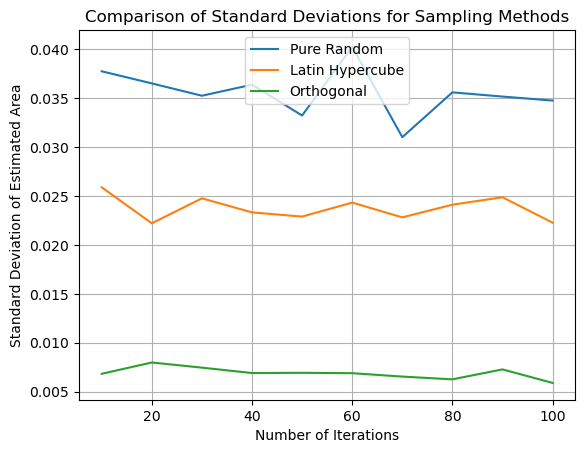

In [11]:
num_samples = 10000
max_iter = 100
num_runs = 80

std_devs_data = {'Pure Random': [], 'Latin Hypercube': [], 'Orthogonal': []}
for max_iter in range(10, 101, 10):
    for method_name, method in zip(std_devs_data.keys(), [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]):
        _, std_dev = compute_accuracy(method, num_samples, max_iter, num_runs)
        std_devs_data[method_name].append(std_dev)

for method_name, std_devs in std_devs_data.items():
    plt.plot(range(10, 101, 10), std_devs, label=method_name)

plt.xlabel('Number of Iterations')
plt.ylabel('Standard Deviation of Estimated Area')
plt.title('Comparison of Standard Deviations for Sampling Methods')
plt.legend()
plt.grid(True)
plt.show()



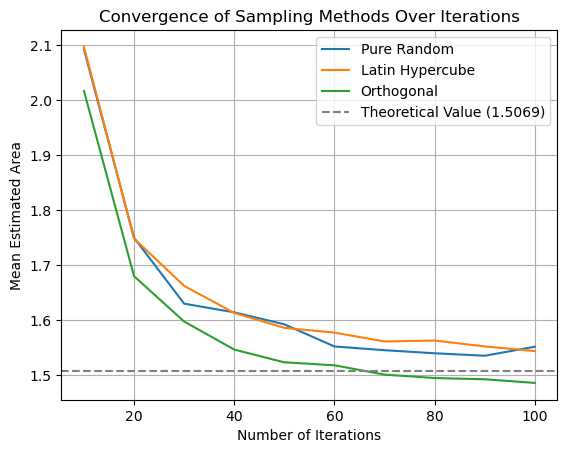

In [12]:
num_samples = 1000
max_iter = 100
num_runs = 80

convergence_data = {'Pure Random': [], 'Latin Hypercube': [], 'Orthogonal': []}
for max_iter in range(10, 101, 10):
    for method_name, method in zip(convergence_data.keys(), [pure_random_sampling, latin_hypercube_sampling, orthogonal_sampling]):
        mean_area, _ = compute_accuracy(method, num_samples, max_iter, num_runs)
        convergence_data[method_name].append(mean_area)

# Comparison of convergence rates
for method_name, mean_areas in convergence_data.items():
    plt.plot(range(10, 101, 10), mean_areas, label=method_name)

plt.axhline(y=1.5069, color='gray', linestyle='--', label='Theoretical Value (1.5069)')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Estimated Area')
plt.title('Convergence of Sampling Methods Over Iterations')
plt.legend()
plt.grid(True)
plt.show()



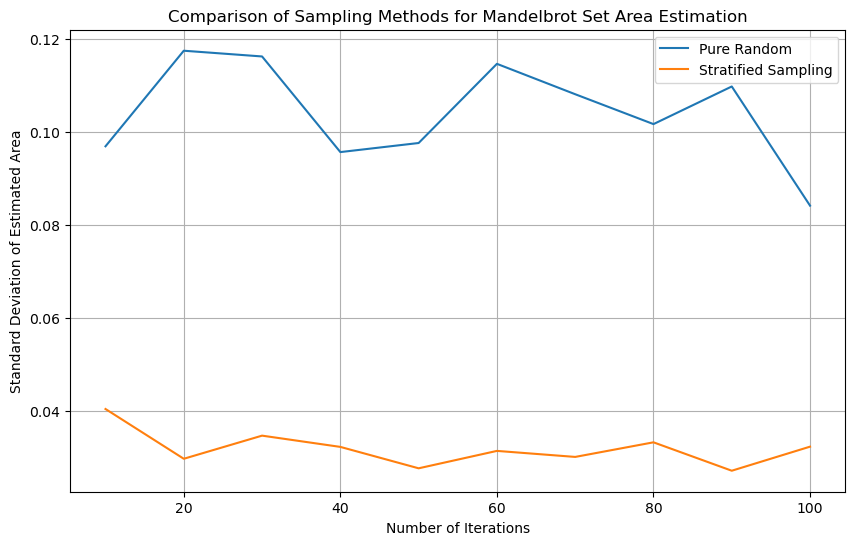

In [14]:
# Question 4


def stratified_sampling(num_samples, max_iter):
    count = 0
    sqrt_samples = int(np.sqrt(num_samples))  
    for i in range(sqrt_samples):
        for j in range(sqrt_samples):
            
            # the bounds of the stratum
            real_min = -2 + (3 / sqrt_samples) * i
            real_max = -2 + (3 / sqrt_samples) * (i + 1)
            imag_min = -1.5 + (3 / sqrt_samples) * j
            imag_max = -1.5 + (3 / sqrt_samples) * (j + 1)

           
            real = np.random.uniform(real_min, real_max)
            imag = np.random.uniform(imag_min, imag_max)
            c = complex(real, imag)

            if mandelbrot(c, max_iter):
                count += 1
    
    return count / num_samples * 9




num_samples = 1000
max_iter = 100
num_runs = 50
std_devs_data = {'Pure Random': [], 'Stratified Sampling': []}

for max_iter in range(10, 101, 10):
    _, std_dev_random = compute_accuracy(pure_random_sampling, num_samples, max_iter, num_runs)
    std_devs_data['Pure Random'].append(std_dev_random)

    _, std_dev_stratified = compute_accuracy(stratified_sampling, num_samples, max_iter, num_runs)
    std_devs_data['Stratified Sampling'].append(std_dev_stratified)

    

plt.figure(figsize=(10, 6))
for method_name, std_devs in std_devs_data.items():
    plt.plot(range(10, 101, 10), std_devs, label=method_name)

plt.xlabel('Number of Iterations')
plt.ylabel('Standard Deviation of Estimated Area')
plt.title('Comparison of Sampling Methods for Mandelbrot Set Area Estimation')
plt.legend()
plt.grid(True)
plt.show()

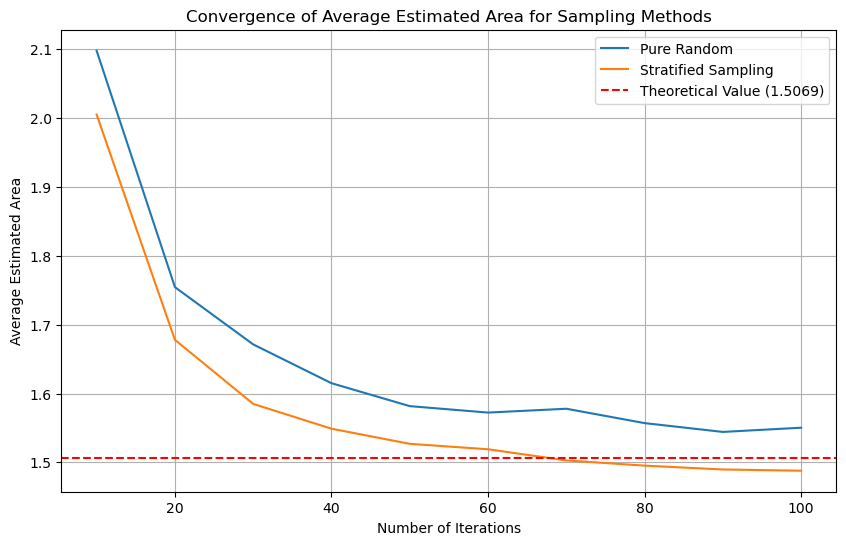

In [17]:
average_areas_data = {'Pure Random': [], 'Stratified Sampling': []}
for max_iter in range(10, 101, 10):
    mean_random,_ = compute_accuracy(pure_random_sampling, num_samples, max_iter, num_runs)
    average_areas_data['Pure Random'].append(mean_random)

    mean_stratified, _ = compute_accuracy(stratified_sampling, num_samples, max_iter, num_runs)
    average_areas_data['Stratified Sampling'].append(mean_stratified)


    
theoretical_value = 1.5069  



plt.figure(figsize=(10, 6))
for method_name, avg_areas in average_areas_data.items():
    plt.plot(range(10, 101, 10), avg_areas, label=method_name)


plt.axhline(y=theoretical_value, color='r', linestyle='--', label='Theoretical Value (1.5069)')

plt.xlabel('Number of Iterations')
plt.ylabel('Average Estimated Area')
plt.title('Convergence of Average Estimated Area for Sampling Methods')
plt.legend()
plt.grid(True)
plt.show()